In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

housing = pd.read_csv('ds620_pe03_housing.csv')

In [20]:
#note the shape of the dataset
housing.shape


(20640, 2)

In [21]:
#inspect the top of the dataset
housing.head()


,median_income,median_house_value
0,8.3252,452600
1,8.3014,358500
2,7.2574,352100
3,5.6431,341300
4,3.8462,342200


In [22]:
#inspect the bottom of the dataset
housing.tail()

,median_income,median_house_value
20635,1.5603,78100
20636,2.5568,77100
20637,1.7000,92300
20638,1.8672,84700
20639,2.3886,89400


In [23]:
# Question #1
# Consider y = median_house_value as our output and x = median_income as our input
# What the mathematical formula for the regression line with x as input and y as output?

The mathematical formula for a linear regression line with input $x$ and output $y$ is:

$y = mx + b$

where:
* $y$ is the dependent variable (output)
* $x$ is the independent variable (input)
* $m$ is the slope of the line
* $b$ is the y-intercept (the value of $y$ when $x$ is 0)

In [24]:
# Let's assign x and y
X = housing.iloc[:, 0].values.reshape(-1, 1)
y = housing.iloc[:, 1]

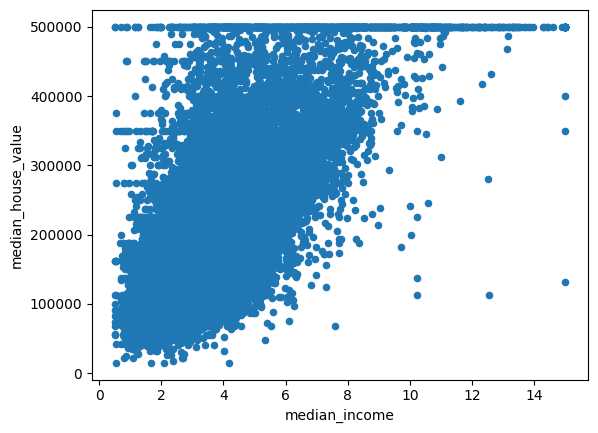

In [25]:
# Question # 2
# Since housing is a dataframe you can use the plot fucntion directly on housing.
# plot the scatter plot of "median_income" and "median_house_value".
# make sure the x-axis is labeled "median_income" and the y-axis is labeled "median_house_value"
# Show the plot in the notebook
housing.plot(kind="scatter", x="median_income", y="median_house_value")
plt.show()

In [26]:
# Question #3
# to ensure everyone's results are the same, set the random seed to (10) using the function random.seed()
# Don't forget the related import

In [27]:
import random
random.seed(10)

In [28]:
# Question #4
# split the datasets into training and test sets using 30% of the data for testing.
#Remember: housing_medium_house_value is the y and the income is the x

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [29]:
#Using scikit-learn to build a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [30]:
# Question #5
# what are the y_intercept and the slope produced by the lr model you just trained?
# See "The Normal Equation" Section in Chapter 4 to find out how to get the intercept and slope
# Show the functions used below

print("Y-intercept:", lr.intercept_)
print("Slope:", lr.coef_[0])

Y-intercept: 45089.409277618426
Slope: 41811.368177445904


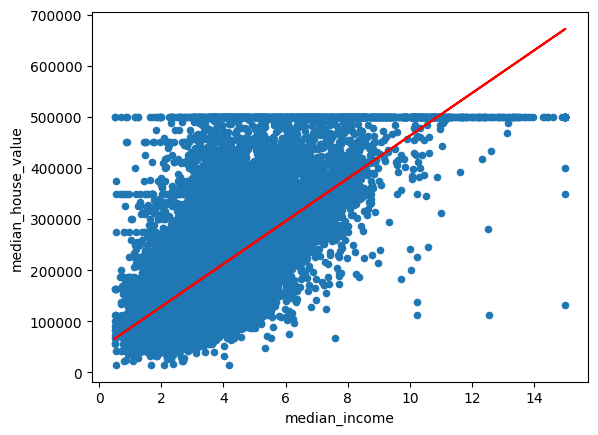

In [31]:
# Question #6
# Redo the plot from question #2, but this time show the regression line in the color red

housing.plot(kind='scatter', x='median_income', y='median_house_value', xlabel='median_income', ylabel='median_house_value')
# Get the slope and intercept from the trained model
m = lr.coef_[0]
b = lr.intercept_

# Generate points for the regression line
x_values = np.array([housing["median_income"].min(), housing["median_income"].max()])
y_values = m * x_values + b
plt.plot(X, lr.predict(X), color='red')
plt.show()

In [32]:
# Question #7
# What is the predicted house value for the following income values:
# a) 3.8
# b) 8.5
# What is the MSE for the trained model?

# Predict house values
predicted_house_value_a = lr.predict([[3.8]])
predicted_house_value_b = lr.predict([[8.5]])

print(f"Predicted house value for income 3.8: {predicted_house_value_a[0]:,.2f}")
print(f"Predicted house value for income 8.5: {predicted_house_value_b[0]:,.2f}")

# Calculate MSE
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:,.2f}")

Predicted house value for income 3.8: 203,972.61
Predicted house value for income 8.5: 400,486.04
Mean Squared Error (MSE): 7,111,920,915.85


In [33]:
# Question #8
# change the code block into a Python function that takes the learning rate eta as an argument and outputs the slope m and y_intercept b
# call the function linear_GD and write it into the cell below.
def linear_GD(eta_):
    # BATCH GRADIENT DESCENT
    # use the block of code below to find the slope and y_intercept of the regression line through the income (x) and value (y) scatter plot

    # Building the model
    m = 0  # initialize slope
    b = 0  # initialize y_intercept

    eta = eta_  # The learning Rate
    epochs = 1000  # The number of iterations to perform gradient descent
    # epochs = 100000

    n = float(len(X))  # number of elements in X

    # Performing Gradient Descent
    for i in range(epochs):
        y_pred = m * X + b  # The current predicted value of y
        D_m = (-2 / n) * np.sum(X * (y.values.reshape(-1, 1) - y_pred))  # Derivative wrt m - fixed to ensure element-wise multiplication
        D_b = (-2 / n) * np.sum(y.values.reshape(-1, 1) - y_pred)  # Derivative wrt b - fixed to ensure element-wise multiplication
        m = m - eta * D_m  # Update m
        b = b - eta * D_b  # Update c

    return m, b

In [34]:
# Question #9
# run the linear_GD function for values of eta=0.001, eta = 0.1, and eta = 0.5
# what are the slope and intercept values for each eta?
# what are your observations as the learning rate increases?
import pandas as pd
import numpy as np

# Load the data and define X and y
housing = pd.read_csv('ds620_pe03_housing.csv')
X = housing.iloc[:, 0].values.reshape(-1, 1)
y = housing.iloc[:, 1]

etas = [0.001, 0.1, 0.5]

for eta in etas:
    m, b = linear_GD(eta)
    print(f"For eta = {eta}:")
    print(f"  Slope (m): {m}")
    print(f"  Y-intercept (b): {b}")

For eta = 0.001:
  Slope (m): 46832.72448121045
  Y-intercept (b): 21125.447583768942
For eta = 0.1:
  Slope (m): nan
  Y-intercept (b): nan
For eta = 0.5:
  Slope (m): nan
  Y-intercept (b): nan


/home/codespace/.local/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/tmp/ipykernel_3386/570209824.py:23: RuntimeWarning: invalid value encountered in scalar subtract
  m = m - eta * D_m  # Update m


/home/codespace/.local/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/tmp/ipykernel_3386/570209824.py:23: RuntimeWarning: invalid value encountered in scalar subtract
  m = m - eta * D_m  # Update m


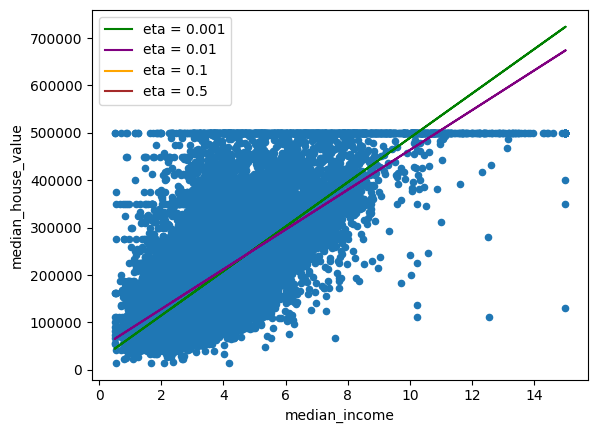

In [35]:
# Question #10
# plot the X,y scatter plot again, this time add the four regression lines based on m and b found with eta=0.001, 0.01, 0.1, and 0.5 found above.
# Use different colors and a legend to indicate the associated learning rate.

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

housing = pd.read_csv('ds620_pe03_housing.csv')

# Let's assign x and y
X = housing.iloc[:, 0].values.reshape(-1, 1)
y = housing.iloc[:, 1]

housing.plot(kind='scatter', x='median_income', y='median_house_value', xlabel='median_income', ylabel='median_house_value')

etas = [0.001, 0.01, 0.1, 0.5] # Include eta = 0.01 from the initial batch gradient descent cell
colors = ['green', 'purple', 'orange', 'brown']

for i, eta in enumerate(etas):
    if eta == 0.01:
        # Use the m and b from the initial batch gradient descent cell (kFTFgKUX4OKR)
        m = 41969.81412988478
        b = 44248.85379162605
        plt.plot(X, m*X + b, color=colors[i], label=f'eta = {eta}')
    else:
        m, b = linear_GD(eta)
        plt.plot(X, m*X + b, color=colors[i], label=f'eta = {eta}')

plt.legend()
plt.show()

Using an excessively large learning rate in gradient descent can lead to divergence because the updates to the model parameters become too drastic. Instead of gradually approaching the minimum of the cost function, the algorithm may overshoot it, oscillate unpredictably, or even move farther away from the optimal point with each iteration. It’s similar to trying to reach the bottom of a valley by taking huge jumps — you might leap past the lowest point or end up outside the valley altogether. A smaller learning rate ensures more precise, controlled steps, allowing the algorithm to steadily converge to the true minimum.